In [70]:
from bluesky import RunEngine
from bluesky.plans import count
from bluesky.callbacks import LiveTable, LivePlot
from ophyd.sim import noisy_det, jittery_motor1

### Simulated Detectors

| Detector   | Motor                          | Decription      | Center | Max | Sigma | Fly Scan Procedure |
| --------   | -----                          | ----------      | ------ | --- | ----- | ------------------ |
| noisy_det  | motor                          | Gaussian Signal | 0      | 1   | 1     |                    |
| det        | motor                          | Gaussian Signal | 0      | 1   | 1     |                    |
| det1       | motor1                         | Gaussian Signal | 0      | 5   | 0.5   |                    |
| det2       | motor2                         | Gaussian Signal | 1      | 2   | 2     |                    |
| det3       | motor3                         | Gaussian Signal | -1     | 2   | 1     |                    |
| det4       | motor1, motor2                 | Gaussian Signal | (0, 0) | 1   |       |                    |
| det5       | jittery_motor1, jittery_motor2 | Gaussian Signal | (0, 0) | 1   |       |                    |
| flyer1     | motor                          | Fly Scan Signal |        |     |       | 20 acquisitions - motor goes from 1 to 5 |
| flyer2     | motor                          | Fly Scan Signal |        |     |       | 10 acquisitions - motor goes from 1 to 5 |
| rand       |                                | Random Signal   |        |     |       |                    |
| rand2      |                                | Random Signal   |        |     |       |                    |



## Ophyd details

In [71]:
noisy_det.describe()

OrderedDict([('noisy_det',
              {'source': 'SIM:noisy_det',
               'dtype': 'number',
               'shape': [],
               'precision': 3})])

In [72]:
noisy_det.read()

OrderedDict([('noisy_det',
              {'value': 1.035963357586292, 'timestamp': 1724701017.8844204})])

In [73]:
noisy_det.read_configuration()

OrderedDict([('noisy_det_Imax', {'value': 1, 'timestamp': 1724700646.7956977}),
             ('noisy_det_center',
              {'value': 0, 'timestamp': 1724700646.7956898}),
             ('noisy_det_sigma',
              {'value': 1, 'timestamp': 1724700646.7957087}),
             ('noisy_det_noise',
              {'value': 'uniform', 'timestamp': 1724700646.7957153}),
             ('noisy_det_noise_multiplier',
              {'value': 0.1, 'timestamp': 1724700646.795737})])

In [75]:
noisy_det.summary()

data keys (* hints)
-------------------
*noisy_det

read attrs
----------
val                  SynSignal           ('noisy_det')

config keys
-----------
noisy_det_Imax
noisy_det_center
noisy_det_noise
noisy_det_noise_multiplier
noisy_det_sigma

configuration attrs
-------------------
Imax                 Signal              ('noisy_det_Imax')
center               Signal              ('noisy_det_center')
sigma                Signal              ('noisy_det_sigma')
noise                EnumSignal          ('noisy_det_noise')
noise_multiplier     Signal              ('noisy_det_noise_multiplier')

unused attrs
------------



In [76]:
jittery_motor1.

In [74]:
help(count)

Help on function count in module bluesky.plans:

count(detectors, num=1, delay=None, *, per_shot=None, md=None)
    Take one or more readings from detectors.
    
    Parameters
    ----------
    detectors : list
        list of 'readable' objects
    num : integer, optional
        number of readings to take; default is 1
    
        If None, capture data until canceled
    delay : iterable or scalar, optional
        Time delay in seconds between successive readings; default is 0.
    per_shot : callable, optional
        hook for customizing action of inner loop (messages per step)
        Expected signature ::
    
           def f(detectors: Iterable[OphydObj]) -> Generator[Msg]:
               ...
    
    md : dict, optional
        metadata
    
    Notes
    -----
    If ``delay`` is an iterable, it must have at least ``num - 1`` entries or
    the plan will raise a ``ValueError`` during iteration.



In [23]:
RE = RunEngine()

## Count

In [24]:
RE(
    count([noisy_det], num=5, delay=1),
    LiveTable(["noisy_det"]))



+-----------+------------+------------+
|   seq_num |       time |  noisy_det |
+-----------+------------+------------+
|         1 | 16:36:51.2 |      0.982 |
|         2 | 16:36:52.2 |      0.930 |
|         3 | 16:36:53.2 |      0.923 |
|         4 | 16:36:54.2 |      0.922 |
|         5 | 16:36:55.2 |      0.980 |
+-----------+------------+------------+
generator count ['b2bef6e5'] (scan num: 1)




('b2bef6e5-ad88-4d48-b7c4-f191594708bf',)

('a9c0f35c-a2af-479f-95f6-d737367aa313',)

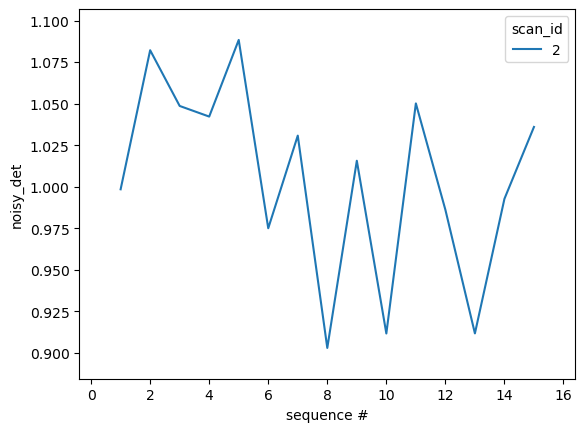

In [25]:
RE(
    count([noisy_det], num=15, delay=0.1),
    LivePlot(y="noisy_det"))